## EDA

Library berhasil diimpor.
Data berhasil dimuat.
Jumlah data ground truth training: 5240
Jumlah data metadata test: 958
Jumlah data suplemen training: 10480

--- Info Data Ground Truth Training ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5240 entries, 0 to 5239
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lesion_id  5240 non-null   object 
 1   AKIEC      5240 non-null   float64
 2   BCC        5240 non-null   float64
 3   BEN_OTH    5240 non-null   float64
 4   BKL        5240 non-null   float64
 5   DF         5240 non-null   float64
 6   INF        5240 non-null   float64
 7   MAL_OTH    5240 non-null   float64
 8   MEL        5240 non-null   float64
 9   NV         5240 non-null   float64
 10  SCCKA      5240 non-null   float64
 11  VASC       5240 non-null   float64
dtypes: float64(11), object(1)
memory usage: 491.4+ KB

Contoh Data Ground Truth Training:
    lesion_id  AKIEC  BCC  BEN_OTH  BKL   DF 

/tmp/ipykernel_14001/3830576036.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diagnosis_counts_mapped.values, y=diagnosis_counts_mapped.index, palette="viridis", orient='h')


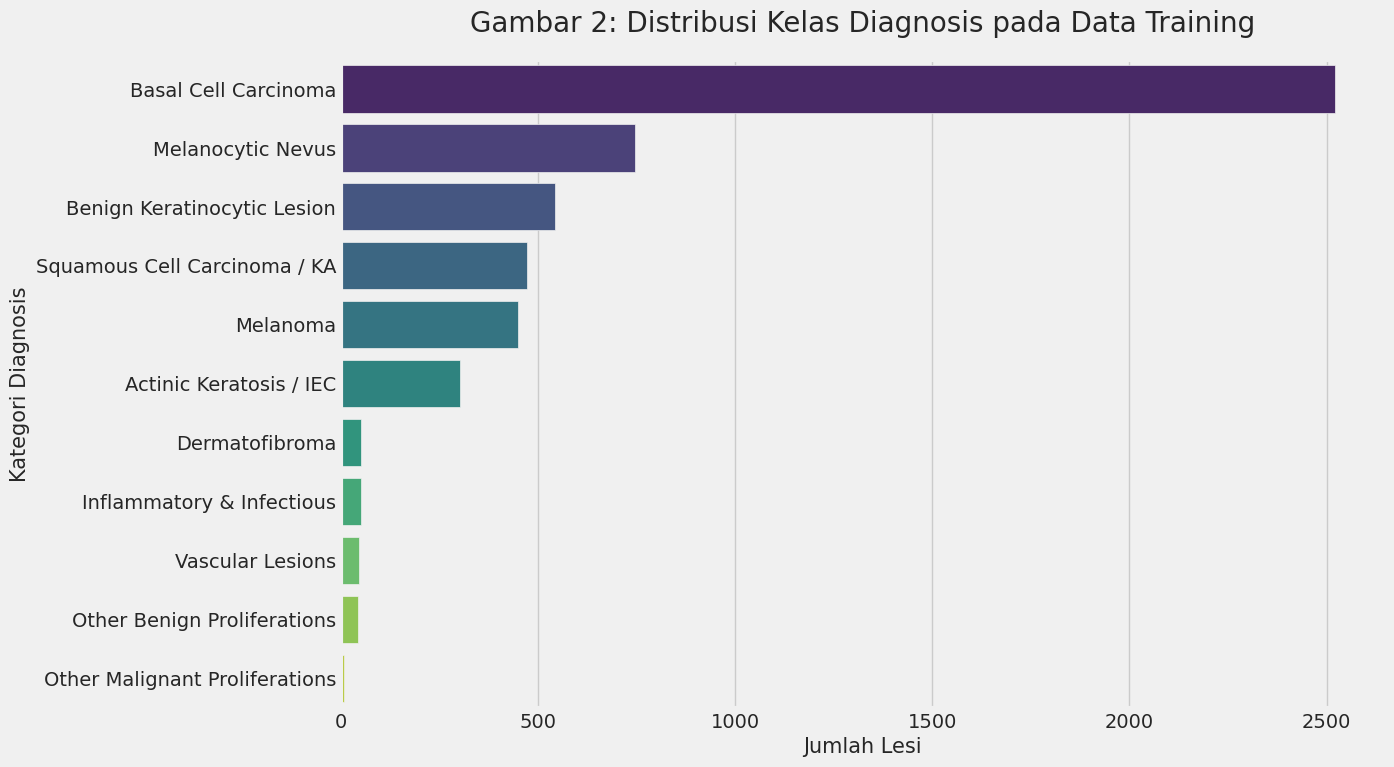


Analisis demografi akan dijalankan (kode tidak ditampilkan ulang)...

Mempersiapkan Galeri Gambar 1: Contoh untuk setiap penyakit...


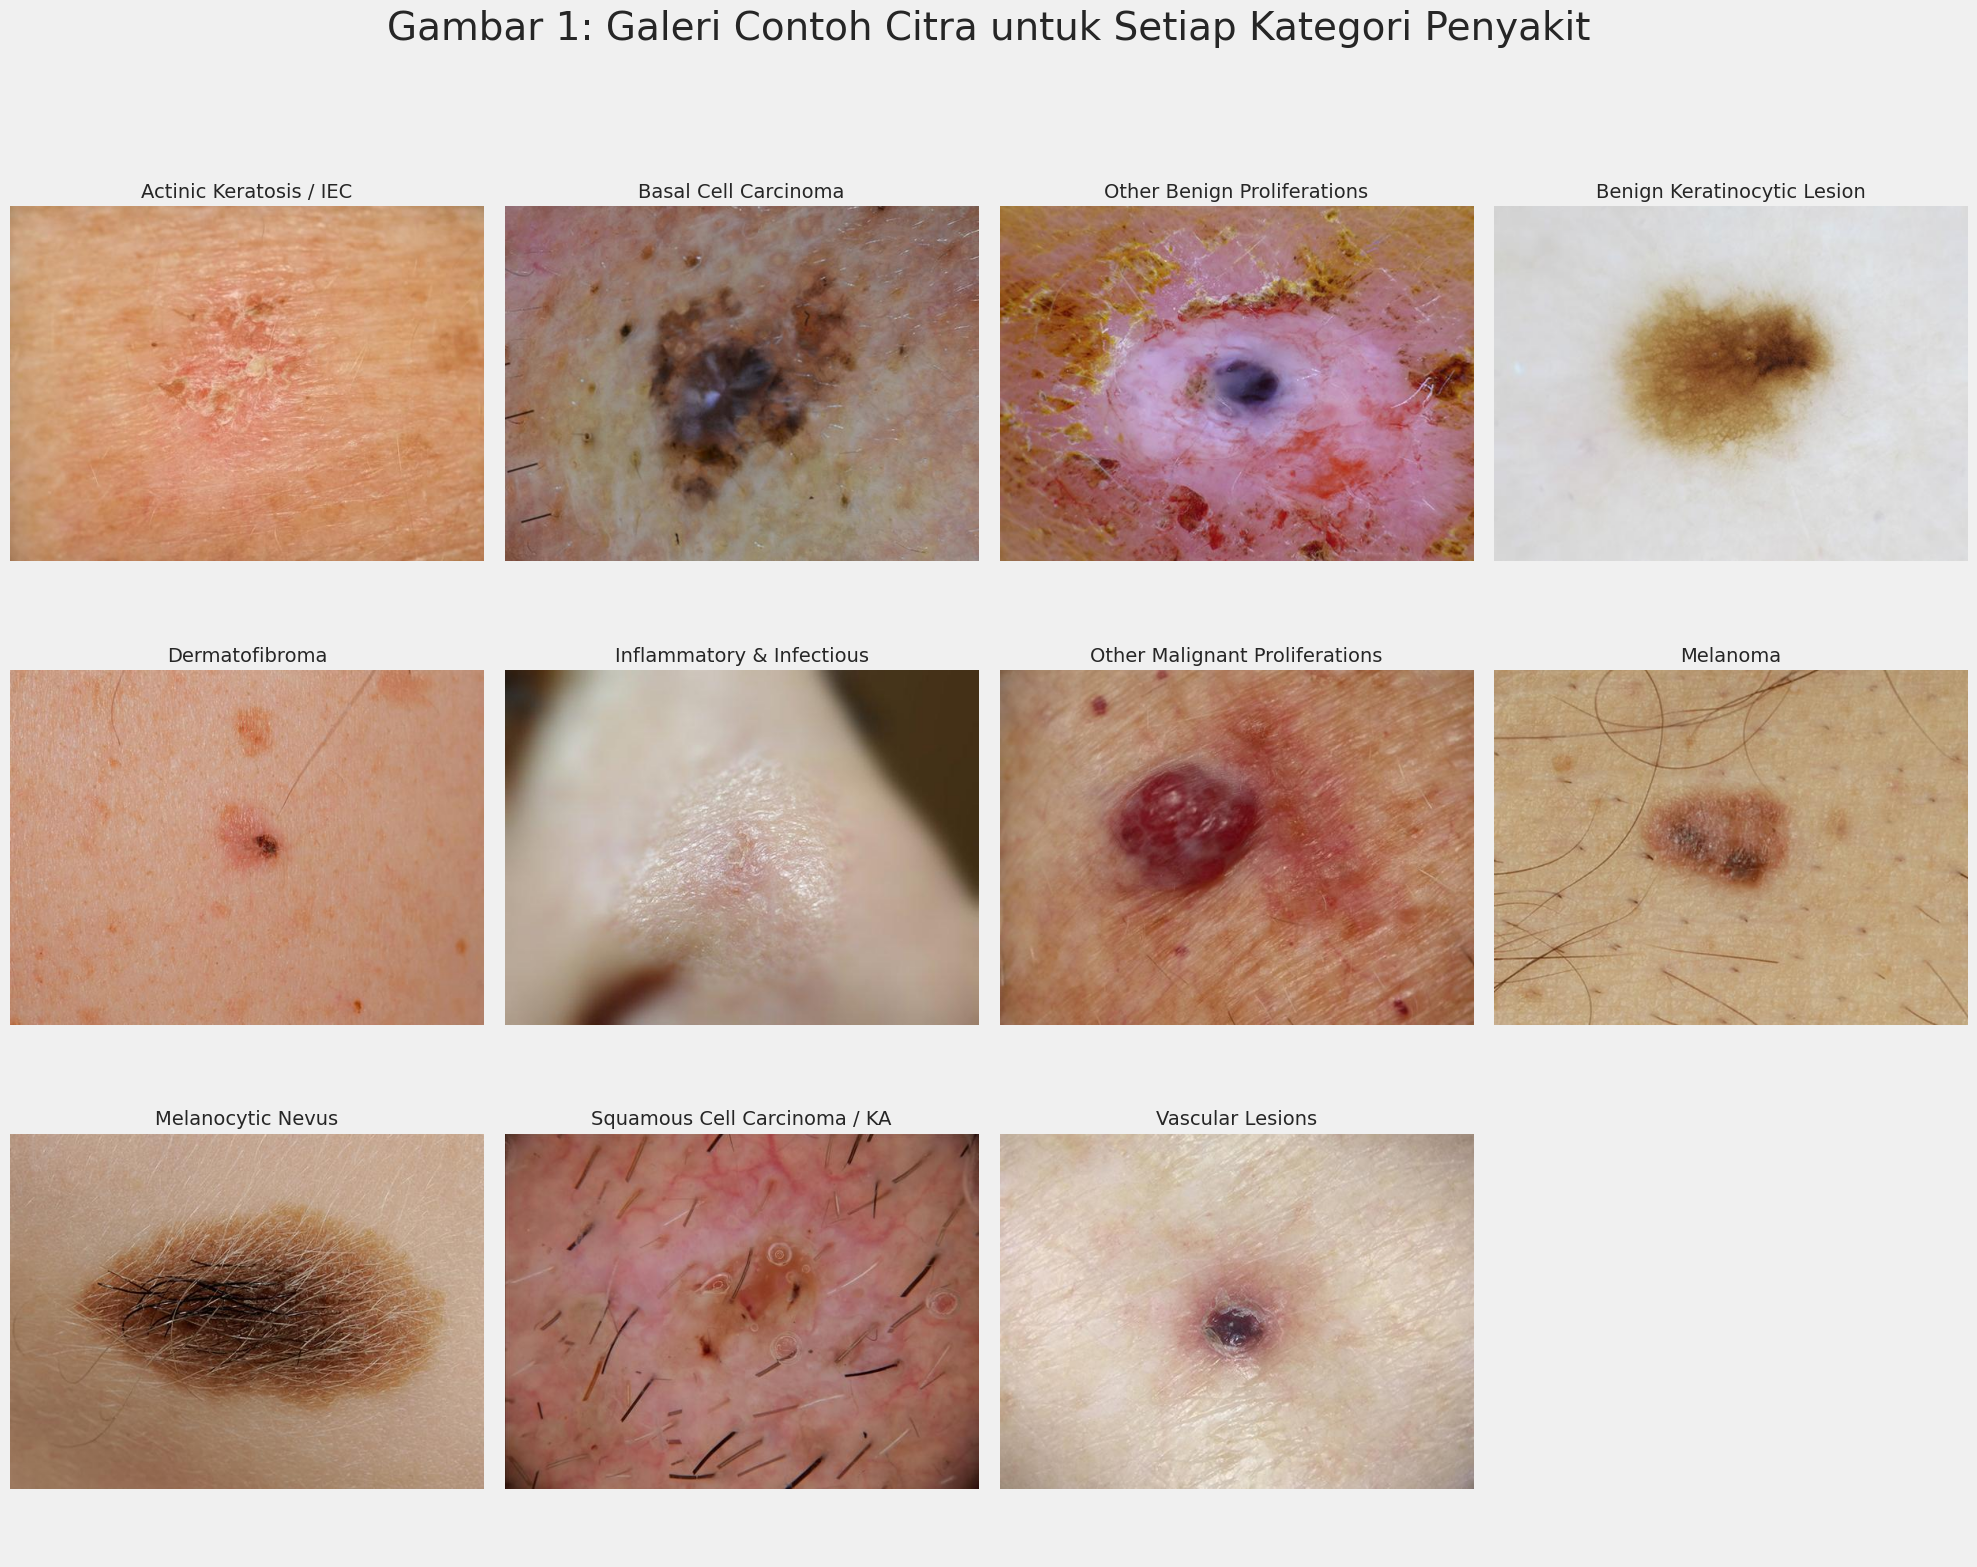

In [5]:
# ==============================================================================
# 1. IMPORT LIBRARY
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Mengatur style visualisasi
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
print("Library berhasil diimpor.")

# ==============================================================================
# 2. MEMUAT DATASET
# ==============================================================================
# Tentukan path ke direktori dataset
BASE_PATH = "../dataset/"

# Path untuk file-file CSV
train_truth_path = os.path.join(BASE_PATH, "MILK10k_Training_GroundTruth.csv")
train_supp_path = os.path.join(BASE_PATH, "MILK10k_Training_Supplement.csv")
test_meta_path = os.path.join(BASE_PATH, "MILK10k_Test_Metadata.csv")

# Path untuk folder citra
train_img_path = os.path.join(BASE_PATH, "MILK10k_Training_Input")
test_img_path = os.path.join(BASE_PATH, "MILK10k_Test_Input")

# Memuat data CSV ke dalam DataFrame pandas
df_train_truth = pd.read_csv(train_truth_path)
df_train_supp = pd.read_csv(train_supp_path)
df_test_meta = pd.read_csv(test_meta_path)

print("Data berhasil dimuat.")
print(f"Jumlah data ground truth training: {len(df_train_truth)}")
print(f"Jumlah data metadata test: {len(df_test_meta)}")
print(f"Jumlah data suplemen training: {len(df_train_supp)}")


# ==============================================================================
# 3. INSPEKSI DATA AWAL
# ==============================================================================
# (Bagian ini tetap sama, untuk kelengkapan disertakan kembali)
# --- Inspeksi Data Ground Truth Training ---
print("\n--- Info Data Ground Truth Training ---")
df_train_truth.info()
print("\nContoh Data Ground Truth Training:")
print(df_train_truth.head())

# --- Inspeksi Data Metadata Test ---
print("\n--- Info Data Metadata Test ---")
df_test_meta.info()
print("\nContoh Data Metadata Test:")
print(df_test_meta.head())

# --- Cek nilai null ---
print("\n--- Pengecekan Nilai Null ---")
print("Nilai null di df_train_truth:\n", df_train_truth.isnull().sum())
print("\nNilai null di df_test_meta:\n", df_test_meta.isnull().sum())


# ==============================================================================
# 4. ANALISIS DATA EKSPLORASI (EDA)
# ==============================================================================

# ------------------------------------------------------------------------------
# 4.1. Analisis Distribusi Diagnosis (Data Training) - (Gambar 2)
# ------------------------------------------------------------------------------
diagnosis_columns = ['AKIEC', 'BCC', 'BEN_OTH', 'BKL', 'DF', 'INF', 'MAL_OTH', 'MEL', 'NV', 'SCCKA', 'VASC']
diagnosis_counts = df_train_truth[diagnosis_columns].sum().sort_values(ascending=False)
diagnosis_mapping = {
    'AKIEC': 'Actinic Keratosis / IEC', 'BCC': 'Basal Cell Carcinoma',
    'BEN_OTH': 'Other Benign Proliferations', 'BKL': 'Benign Keratinocytic Lesion',
    'DF': 'Dermatofibroma', 'INF': 'Inflammatory & Infectious',
    'MAL_OTH': 'Other Malignant Proliferations', 'MEL': 'Melanoma',
    'NV': 'Melanocytic Nevus', 'SCCKA': 'Squamous Cell Carcinoma / KA',
    'VASC': 'Vascular Lesions'
}
diagnosis_counts_mapped = diagnosis_counts.rename(index=diagnosis_mapping)
plt.figure(figsize=(12, 8))
sns.barplot(x=diagnosis_counts_mapped.values, y=diagnosis_counts_mapped.index, palette="viridis", orient='h')
plt.title('Gambar 2: Distribusi Kelas Diagnosis pada Data Training', fontsize=20, pad=20)
plt.xlabel('Jumlah Lesi', fontsize=15)
plt.ylabel('Kategori Diagnosis', fontsize=15)
plt.show()

# ------------------------------------------------------------------------------
# 4.2. Analisis Demografi & Klinis (Data Test)
# ------------------------------------------------------------------------------
# (Bagian ini tetap sama, diskip agar tidak terlalu panjang)
print("\nAnalisis demografi akan dijalankan (kode tidak ditampilkan ulang)...")


# === PERBAIKAN DIMULAI DI SINI: MENGGANTI KODE 4.3 ===

# ------------------------------------------------------------------------------
# 4.3. Galeri Citra untuk Setiap Kategori Diagnosis (Gambar 1)
# ------------------------------------------------------------------------------
# Fungsi ini akan membuat galeri berisi satu contoh gambar untuk setiap 11 penyakit
# dan menampilkannya dalam satu frame (grid).

print("\nMempersiapkan Galeri Gambar 1: Contoh untuk setiap penyakit...")

# Cari satu contoh lesion_id untuk setiap kategori penyakit
example_lesions = {}
for disease in diagnosis_columns:
    try:
        # Ambil lesion_id pertama yang cocok untuk penyakit ini
        lesion_id = df_train_truth[df_train_truth[disease] == 1.0]['lesion_id'].iloc[0]
        example_lesions[disease] = lesion_id
    except IndexError:
        # Jika tidak ada contoh untuk kategori ini
        example_lesions[disease] = None

# Siapkan grid plot. 3 baris dan 4 kolom cukup untuk 11 gambar.
fig, axes = plt.subplots(3, 4, figsize=(20, 16))
axes = axes.flatten()  # Ubah array 2D menjadi 1D agar mudah di-loop

# Loop melalui setiap penyakit dan plot contoh gambarnya
for i, disease in enumerate(diagnosis_columns):
    lesion_id = example_lesions.get(disease)
    ax = axes[i]
    
    if lesion_id:
        image_folder = os.path.join(train_img_path, lesion_id)
        try:
            # Ambil gambar pertama dari folder lesi terkait
            image_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
            if image_files:
                image_path = os.path.join(image_folder, image_files[0])
                img = Image.open(image_path)
                ax.imshow(img)
                ax.set_title(f"{diagnosis_mapping[disease]}", fontsize=14)
            else:
                ax.set_title(f"{diagnosis_mapping[disease]}\n(Gambar tidak ditemukan)", fontsize=12)
        except FileNotFoundError:
            ax.set_title(f"{diagnosis_mapping[disease]}\n(Folder tidak ditemukan)", fontsize=12)
    else:
        ax.set_title(f"{diagnosis_mapping[disease]}\n(Tidak ada data lesi)", fontsize=12)
        
    ax.axis('off')

# Sembunyikan subplot yang tidak terpakai (jika ada)
for j in range(len(diagnosis_columns), len(axes)):
    axes[j].axis('off')

plt.suptitle('Gambar 1: Galeri Contoh Citra untuk Setiap Kategori Penyakit', fontsize=28, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Atur layout agar judul utama tidak tumpang tindih
plt.show()

# === PERBAIKAN SELESAI ===

In [9]:
# ==============================================================================
# 1. SETUP DAN MEMUAT DATA
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from PIL import Image

# Mengatur style visualisasi
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Tentukan path ke direktori dataset
BASE_PATH = "../dataset/"
train_truth_path = os.path.join(BASE_PATH, "MILK10k_Training_GroundTruth.csv")
test_meta_path = os.path.join(BASE_PATH, "MILK10k_Test_Metadata.csv")
train_img_path = os.path.join(BASE_PATH, "MILK10k_Training_Input")
test_img_path = os.path.join(BASE_PATH, "MILK10k_Test_Input")

# Memuat data CSV
df_train_truth = pd.read_csv(train_truth_path)
df_test_meta = pd.read_csv(test_meta_path)

print("Library dan data awal berhasil dimuat.")

# ==============================================================================
# 2. EDA LANJUTAN (ADVANCED EDA)
# ==============================================================================

# ------------------------------------------------------------------------------
# 2.1. Verifikasi Rasio Pembagian Dataset (Train-Test Split)
# ------------------------------------------------------------------------------
num_train_lesions = df_train_truth['lesion_id'].nunique()
num_test_lesions = df_test_meta['lesion_id'].nunique()
total_lesions = num_train_lesions + num_test_lesions
train_ratio = (num_train_lesions / total_lesions) * 100
test_ratio = (num_test_lesions / total_lesions) * 100

print("\n--- Analisis Rasio Pembagian Dataset ---")
print(f"Total Lesi Unik      : {total_lesions}")
print(f"Jumlah Lesi Training   : {num_train_lesions} ({train_ratio:.2f}%)")
print(f"Jumlah Lesi Testing    : {num_test_lesions} ({test_ratio:.2f}%)")

# ------------------------------------------------------------------------------
# 2.2. Membuat DataFrame Path Gambar dari Direktori
# ------------------------------------------------------------------------------
all_train_images = glob.glob(os.path.join(train_img_path, '*', '*.jpg'))

path_data = []

# === PERBAIKAN DIMULAI DI SINI ===
# Menggunakan cara yang lebih andal untuk mem-parsing path
for path in all_train_images:
    parts = path.replace('\\', '/').split('/')
    lesion_id = parts[-2]  # lesion_id selalu folder kedua dari belakang
    filename = parts[-1]   # filename selalu bagian terakhir
    isic_id = filename.split('.')[0]
    path_data.append({'lesion_id': lesion_id, 'isic_id': isic_id, 'image_path': path})
# === PERBAIKAN SELESAI ===

df_train_paths = pd.DataFrame(path_data)
print("\nDataFrame path gambar training berhasil dibuat:")
print(df_train_paths.head())


# ==============================================================================
# 3. DATA PRE-PROCESSING & TRANSFORMATION
# ==============================================================================

# ------------------------------------------------------------------------------
# 3.1. Menggabungkan Data Training (Paths dan Ground Truth)
# ------------------------------------------------------------------------------
# Sekarang proses merge akan berhasil karena df_train_paths memiliki kolom 'lesion_id'
df_train_full = pd.merge(df_train_paths, df_train_truth, on='lesion_id', how='left')

print("\nDataFrame training setelah digabungkan dengan ground truth:")
df_train_full.info()
print(df_train_full.head())

# ------------------------------------------------------------------------------
# 3.2. Transformasi Tabel: Memisahkan Path Citra Klinis & Dermoskopik
# ------------------------------------------------------------------------------
print("\n--- Transformasi Tabel Test Set ---")
# Menambahkan path lengkap ke df_test_meta
df_test_meta['image_path'] = df_test_meta.apply(
    lambda row: os.path.join(test_img_path, row['lesion_id'], row['isic_id'] + '.jpg'), 
    axis=1
)

df_test_clinical = df_test_meta[df_test_meta['image_type'] == 'clinical: close-up'].rename(
    columns={'image_path': 'clinical_path', 'isic_id': 'clinical_isic_id'}
)
df_test_dermoscopic = df_test_meta[df_test_meta['image_type'] == 'dermoscopic'].rename(
    columns={'image_path': 'dermoscopic_path', 'isic_id': 'dermoscopic_isic_id'}
)

df_test_processed = pd.merge(
    df_test_clinical.drop(columns=['image_type']),
    df_test_dermoscopic[['lesion_id', 'dermoscopic_path', 'dermoscopic_isic_id']],
    on='lesion_id'
)
print("DataFrame test setelah path klinis dan dermoskopik dipisahkan:")
print(df_test_processed.head())

print("\n--- Transformasi Tabel Training Set ---")
df_train_pivot = df_train_full.groupby('lesion_id')['image_path'].apply(list).reset_index()
df_train_processed = pd.merge(df_train_truth, df_train_pivot, on='lesion_id')

try:
    df_train_processed[['path_1', 'path_2']] = pd.DataFrame(df_train_processed['image_path'].tolist(), index=df_train_processed.index)
    df_train_processed = df_train_processed.drop(columns=['image_path'])
    print("DataFrame training setelah path klinis dan dermoskopik dipisahkan (sementara sebagai path_1 & path_2):")
    print(df_train_processed.head())
except ValueError:
    print("Beberapa lesi training tidak memiliki pasangan gambar yang lengkap.")

# ------------------------------------------------------------------------------
# 3.3. Strategi Pra-pemrosesan Gambar
# ------------------------------------------------------------------------------
def preprocess_image(image_path, target_size=(224, 224)):
    if not image_path or not os.path.exists(image_path):
        return None
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size)
    img_array = np.array(img)
    normalized_array = img_array / 255.0
    return normalized_array

print("\n--- Contoh Pra-pemrosesan Gambar ---")
example_image_path = df_train_processed.iloc[0]['path_1']
processed_image = preprocess_image(example_image_path)
if processed_image is not None:
    print(f"Path Gambar          : {example_image_path}")
    print(f"Ukuran setelah proses: {processed_image.shape}")


# ==============================================================================
# 4. MENYIMPAN HASIL DATA YANG TELAH DIPROSES
# ==============================================================================
train_output_path = os.path.join(BASE_PATH, 'train_processed.csv')
test_output_path = os.path.join(BASE_PATH, 'test_processed.csv')

df_train_processed.to_csv(train_output_path, index=False)
df_test_processed.to_csv(test_output_path, index=False)

print(f"\nDataFrame yang telah diproses berhasil disimpan di:\n- {train_output_path}\n- {test_output_path}")

Library dan data awal berhasil dimuat.

--- Analisis Rasio Pembagian Dataset ---
Total Lesi Unik      : 5719
Jumlah Lesi Training   : 5240 (91.62%)
Jumlah Lesi Testing    : 479 (8.38%)

DataFrame path gambar training berhasil dibuat:
    lesion_id       isic_id                                         image_path
0  IL_0000652  ISIC_4671410  ../dataset/MILK10k_Training_Input/IL_0000652/I...
1  IL_0000652  ISIC_8149219  ../dataset/MILK10k_Training_Input/IL_0000652/I...
2  IL_0003176  ISIC_3904045  ../dataset/MILK10k_Training_Input/IL_0003176/I...
3  IL_0003176  ISIC_5371928  ../dataset/MILK10k_Training_Input/IL_0003176/I...
4  IL_0004688  ISIC_0791494  ../dataset/MILK10k_Training_Input/IL_0004688/I...

DataFrame training setelah digabungkan dengan ground truth:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   lesion_id   10480 non-null  object 

In [13]:
# ==============================================================================
# 2. MEMUAT DATASET (VERSI PERBAIKAN)
# ==============================================================================
# Tentukan path ke folder 'dataset' secara eksplisit
# Asumsi struktur: 
# PROYEK/
# |- dataset/
# |- notebook/main.ipynb

# === PERBAIKAN DI SINI ===
# Menggunakan path relatif yang lebih jelas dari lokasi notebook
BASE_PATH = "../dataset/"

# Validasi apakah path tersebut benar-benar ada
if not os.path.isdir(BASE_PATH):
    # Jika tidak ada, mungkin notebook dijalankan dari direktori utama
    BASE_PATH = "dataset/"
    print(f"Path diubah ke: '{BASE_PATH}', karena direktori awal tidak ditemukan.")

# Jika masih belum ditemukan, berikan pesan eror yang jelas
if not os.path.isdir(BASE_PATH):
    raise FileNotFoundError(f"Folder dataset tidak dapat ditemukan. Pastikan struktur folder Anda benar dan file berada di '{os.path.abspath(BASE_PATH)}'")

print(f"Menggunakan base path: {os.path.abspath(BASE_PATH)}")
# =======================

# Path untuk file-file CSV
train_truth_path = os.path.join(BASE_PATH, "MILK10k_Training_GroundTruth.csv")
test_meta_path = os.path.join(BASE_PATH, "MILK10k_Test_Metadata.csv")
train_supp_path = os.path.join(BASE_PATH, "MILK10k_Training_Supplement.csv")

# Memuat data CSV ke dalam DataFrame pandas
try:
    df_train_truth = pd.read_csv(train_truth_path)
    df_test_meta = pd.read_csv(test_meta_path)
    df_train_supp = pd.read_csv(train_supp_path)
    
    print("\nData berhasil dimuat.")
    print(f"Jumlah data ground truth training: {len(df_train_truth)}")
    print(f"Jumlah data metadata test: {len(df_test_meta)}")
    print(f"Jumlah data suplemen training: {len(df_train_supp)}")

except FileNotFoundError as e:
    print(f"\nERROR: Terjadi kesalahan saat memuat file.")
    print(f"Detail: {e}")
    print("\nPastikan nama file CSV berikut ini sudah benar dan berada di dalam folder 'dataset':")
    print(f"- MILK10k_Training_GroundTruth.csv")
    print(f"- MILK10k_Test_Metadata.csv")
    print(f"- MILK10k_Training_Supplement.csv")

Menggunakan base path: /mnt/d/PROJECT/Deteksi Otomatis Kanker Kulit Menggunakan Citra Multimodal/dataset

Data berhasil dimuat.
Jumlah data ground truth training: 5240
Jumlah data metadata test: 958
Jumlah data suplemen training: 10480


DataFrame sebelum dan sesudah transformasi berhasil dimuat.

=========== VISUALISASI STRUKTUR TABEL ===========

### TABEL SEBELUM TRANSFORMASI (Format Panjang)
Bentuk (Shape): (958, 17)
Setiap lesi memiliki 2 baris, satu untuk tiap tipe gambar.
    lesion_id          image_type       isic_id
0  IL_0006205  clinical: close-up  ISIC_9611969
1  IL_0006205         dermoscopic  ISIC_5027091
2  IL_0025400  clinical: close-up  ISIC_1495855
3  IL_0025400         dermoscopic  ISIC_8946341

--------------------------------------------------

### TABEL SESUDAH TRANSFORMASI (Format Lebar)
Bentuk (Shape): (479, 19)
Setiap lesi kini hanya memiliki 1 baris, dengan kolom path gambar terpisah.
    lesion_id clinical_isic_id dermoscopic_isic_id  age_approx     sex
0  IL_0006205     ISIC_9611969        ISIC_5027091          70    male
1  IL_0025400     ISIC_1495855        ISIC_8946341          45  female

======= VISUALISASI PRA-PEMROSESAN GAMBAR ========



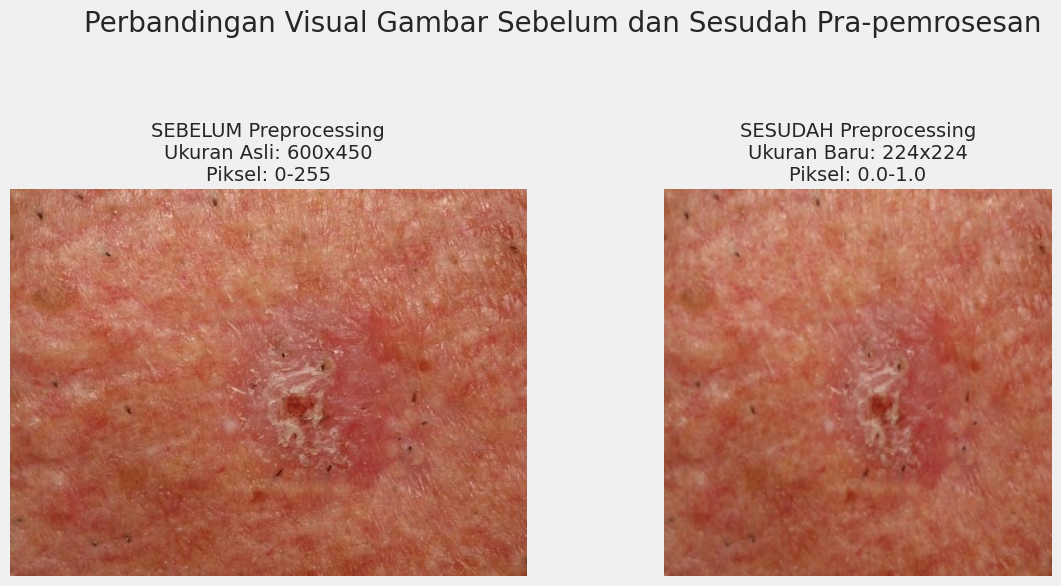

In [10]:
# ==============================================================================
# 1. SETUP DAN MEMUAT DATA
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

# Tentukan path
BASE_PATH = "../dataset/"
# Path file SEBELUM diproses
test_meta_path = os.path.join(BASE_PATH, "MILK10k_Test_Metadata.csv")
# Path file SESUDAH diproses (hasil dari skrip sebelumnya)
test_processed_path = os.path.join(BASE_PATH, "test_processed.csv")

# Memuat kedua versi DataFrame
df_before = pd.read_csv(test_meta_path)
df_after = pd.read_csv(test_processed_path)

print("DataFrame sebelum dan sesudah transformasi berhasil dimuat.")


# ==============================================================================
# 2. PERBANDINGAN STRUKTUR TABEL (SEBELUM vs. SESUDAH)
# ==============================================================================

print("\n" + "="*50)
print(" VISUALISASI STRUKTUR TABEL ".center(50, "="))
print("="*50 + "\n")

# --- TAMPILAN SEBELUM TRANSFORMASI ---
print("### TABEL SEBELUM TRANSFORMASI (Format Panjang)")
print(f"Bentuk (Shape): {df_before.shape}")
print("Setiap lesi memiliki 2 baris, satu untuk tiap tipe gambar.")
print(df_before[['lesion_id', 'image_type', 'isic_id']].head(4))

print("\n" + "-"*50 + "\n")

# --- TAMPILAN SESUDAH TRANSFORMASI ---
print("### TABEL SESUDAH TRANSFORMASI (Format Lebar)")
print(f"Bentuk (Shape): {df_after.shape}")
print("Setiap lesi kini hanya memiliki 1 baris, dengan kolom path gambar terpisah.")
print(df_after[['lesion_id', 'clinical_isic_id', 'dermoscopic_isic_id', 'age_approx', 'sex']].head(2))


# ==============================================================================
# 3. PERBANDINGAN VISUAL GAMBAR (SEBELUM vs. SESUDAH)
# ==============================================================================

print("\n" + "="*50)
print(" VISUALISASI PRA-PEMROSESAN GAMBAR ".center(50, "="))
print("="*50 + "\n")

# Fungsi untuk memproses gambar (sama seperti sebelumnya)
def preprocess_image(image_path, target_size=(224, 224)):
    """Memuat, mengubah ukuran, dan menormalisasi gambar."""
    if not os.path.exists(image_path):
        print(f"File tidak ditemukan: {image_path}")
        return None
    
    img = Image.open(image_path).convert('RGB')
    img_resized = img.resize(target_size)
    img_array = np.array(img_resized)
    normalized_array = img_array / 255.0
    return img, normalized_array

# Ambil satu contoh gambar dari DataFrame yang sudah diproses
example_path = df_after.iloc[0]['clinical_path']

# Dapatkan gambar asli dan gambar yang telah diproses
original_image, processed_image = preprocess_image(example_path)

if original_image and (processed_image is not None):
    # Siapkan plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # --- PLOT GAMBAR SEBELUM ---
    axes[0].imshow(original_image)
    axes[0].set_title(
        f"SEBELUM Preprocessing\n"
        f"Ukuran Asli: {original_image.size[0]}x{original_image.size[1]}\n"
        f"Piksel: 0-255",
        fontsize=14
    )
    axes[0].axis('off')

    # --- PLOT GAMBAR SESUDAH ---
    axes[1].imshow(processed_image)
    axes[1].set_title(
        f"SESUDAH Preprocessing\n"
        f"Ukuran Baru: {processed_image.shape[1]}x{processed_image.shape[0]}\n"
        f"Piksel: {processed_image.min():.1f}-{processed_image.max():.1f}",
        fontsize=14
    )
    axes[1].axis('off')
    
    plt.suptitle("Perbandingan Visual Gambar Sebelum dan Sesudah Pra-pemrosesan", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()